In [1]:
%pip install geopandas fiona pyogrio matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 2.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install dask-geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 17.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 13.0.0
    Uninstalling pyarrow-13.0.0:
      Successfully uninstalled pyarrow-13.0.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import fiona

# Path to your GDB file
gdb_path = "NAMRIA Land Cover Map/1. Geodatabase 3/LCM2020_PH_UTMZ51_PRS92.gdb"

# List available layers in the GDB file
layers = fiona.listlayers(gdb_path)  # Or use gpd.io.file.fiona.listlayers
print("Available layers:", layers)

# Load a specific layer
layer_name = layers[0]  # Replace with the layer you want to visualize
gdf = gpd.read_file(gdb_path, layer=layer_name)


Available layers: ['LCM2020_LUZON_PH_UTMZ51_PRS92']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [4]:
print(gdf.head())
print(gdf.crs)

   CLASS_ID   CLASS_NAME      PROVINCE REG_CODE                 REG_NAME   
0         4  Open Forest  Metro Manila      NCR  NATIONAL CAPITAL REGION  \
1         4  Open Forest  Metro Manila      NCR  NATIONAL CAPITAL REGION   
2         4  Open Forest  Metro Manila      NCR  NATIONAL CAPITAL REGION   
3         4  Open Forest  Metro Manila      NCR  NATIONAL CAPITAL REGION   
4         4  Open Forest  Metro Manila      NCR  NATIONAL CAPITAL REGION   

     AREA_HA    DATA_SRC IMG_ACQ   PSGC_CODE  Shape_Length     Shape_Area   
0   1.804624  SENTINEL-2    2020  1300000000    531.427555   18046.235352  \
1  22.143490  SENTINEL-2    2020  1300000000   4381.405562  221434.900588   
2   1.733911  SENTINEL-2    2020  1300000000    597.099397   17339.108304   
3   1.174471  SENTINEL-2    2020  1300000000    632.738199   11744.706604   
4   5.036434  SENTINEL-2    2020  1300000000   1347.923899   50364.341994   

                                            geometry  
0  MULTIPOLYGON (((282425

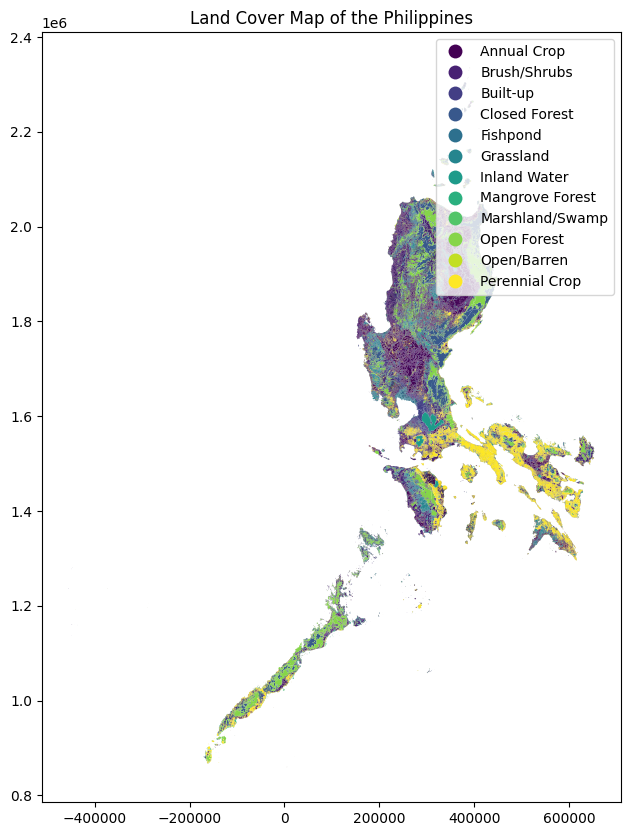

In [7]:
import matplotlib.pyplot as plt

# Plot the data
gdf.plot(column="CLASS_NAME",  # Replace with a column in your data
         cmap="viridis",       # Choose a color map
         legend=True,          # Add a legend
         figsize=(10, 10))

plt.title("Land Cover Map of the Philippines")
plt.show()


In [8]:
gdf.to_file("ph_land_cover_map.geojson", driver="GeoJSON")

In [5]:
import dask_geopandas as dgpd
import fiona

# Path to your GDB file
gdb_path = "NAMRIA Land Cover Map/LCM2020_LUZON_PH_UTMZ51_PRS92.gdb"


# List available layers in the GDB file
layers = fiona.listlayers(gdb_path)  # Or use gpd.io.file.fiona.listlayers
print("Available layers:", layers)

# Load a specific layer
layer_name = layers[0]  # Replace with the layer you want to visualize
dgdf = dgpd.read_file(gdb_path, layer=layer_name, chunksize=1000)

# Perform operations
simplified_dgdf = dgdf.map_partitions(lambda df: df.simplify(tolerance=0.001))

# Convert to GeoPandas for visualization
gdf = simplified_dgdf.compute()
# gdf.plot()

gdf.to_file("luzon_land_cover_map.geojson", driver="GeoJSON")


Available layers: ['LCM2020_LUZON_PH_UTMZ51_PRS92']


Warning 1: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined


In [6]:
import dask_geopandas as dgpd
import fiona

# Path to your GDB file
gdb_path = "NAMRIA Land Cover Map/LCM2020_VISAYAS_PH_UTMZ51_PRS92.gdb"


# List available layers in the GDB file
layers = fiona.listlayers(gdb_path)  # Or use gpd.io.file.fiona.listlayers
print("Available layers:", layers)

# Load a specific layer
layer_name = layers[0]  # Replace with the layer you want to visualize
dgdf = dgpd.read_file(gdb_path, layer=layer_name, chunksize=1000)

# Perform operations
simplified_dgdf = dgdf.map_partitions(lambda df: df.simplify(tolerance=0.001))

# Convert to GeoPandas for visualization
gdf = simplified_dgdf.compute()
# gdf.plot()

gdf.to_file("visayas_land_cover_map.geojson", driver="GeoJSON")


Available layers: ['LCM2020_VISAYAS_PH_UTMZ51_PRS92']


In [2]:
import dask_geopandas as dgpd
import fiona

# Path to your GDB file
gdb_path = "NAMRIA Land Cover Map/LCM2020_MINDANAO_PH_UTMZ51_PRS92.gdb"


# List available layers in the GDB file
layers = fiona.listlayers(gdb_path)  # Or use gpd.io.file.fiona.listlayers
print("Available layers:", layers)

# Load a specific layer
layer_name = layers[0]  # Replace with the layer you want to visualize
dgdf = dgpd.read_file(gdb_path, layer=layer_name, chunksize=1000)

# Perform operations
simplified_dgdf = dgdf.map_partitions(lambda df: df.simplify(tolerance=0.001))

# Convert to GeoPandas for visualization
gdf = simplified_dgdf.compute()
# gdf.plot()

gdf.to_file("mindanao_land_cover_map.geojson", driver="GeoJSON")


Available layers: ['LCM2020_MINDANAO_PH_UTMZ51_PRS92']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [ ]:

# Path to your GDB file
gdb_path = "NAMRIA Land Cover Map/LCM2020_PH_UTMZ51_PRS92.gdb"


# List available layers in the GDB file
layers = fiona.listlayers(gdb_path)  # Or use gpd.io.file.fiona.listlayers
print("Available layers:", layers)

# Load a specific layer
layer_name = layers[0]  # Replace with the layer you want to visualize
dgdf = dgpd.read_file(gdb_path, layer=layer_name, chunksize=1000)

# Perform operations
simplified_dgdf = dgdf.map_partitions(lambda df: df.simplify(tolerance=0.001))

# Convert to GeoPandas for visualization
gdf = simplified_dgdf.compute()
# gdf.plot()

gdf.to_file("ph_land_cover_map.geojson", driver="GeoJSON")


Available layers: ['LCM2020_PH_UTMZ51_PRS92', 'LCM2020_LUZON_PH_UTMZ51_PRS92']


# Visualize all geoJSON files

In [16]:
mindanao = gpd.read_file("NAMRIA Land Cover Map/mindanao_land_cover_map.geojson")

DataSourceError: Failed to read GeoJSON data

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON files
# luzon = gpd.read_file("NAMRIA Land Cover Map/luzon_land_cover_map.geojson")
# visayas = gpd.read_file("NAMRIA Land Cover Map/visayas_land_cover_map.geojson")
# mindanao = gpd.read_file("NAMRIA Land Cover Map/mindanao_land_cover_map.geojson")

# Combine into a single GeoDataFrame
philippines = gpd.GeoDataFrame(pd.concat([luzon, visayas], ignore_index=True))

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
philippines.plot(ax=ax, color="lightblue", edgecolor="black")
plt.title("Land Cover Map of the Philippines")
plt.show()


: 

In [ ]:
%pip install folium

In [ ]:
import folium

# Create a base map centered on the Philippines
m = folium.Map(location=[12.8797, 121.7740], zoom_start=6)  # Center of the Philippines

# Add each GeoJSON file
folium.GeoJson("luzon.geojson", name="Luzon").add_to(m)
folium.GeoJson("visayas.geojson", name="Visayas").add_to(m)
folium.GeoJson("mindanao.geojson", name="Mindanao").add_to(m)

# Add a layer control
folium.LayerControl().add_to(m)

# Save or display the map
m.save("philippines_map.html")  # Save as an HTML file
m  # Display in a Jupyter Notebook or a browser
